# **IMPORTS**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install shap > temp.txt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import accuracy_score

import shap

# **LOAD DATASET**

In [5]:
raw_df = pd.read_csv("/content/drive/MyDrive/EC/datathon-2.0/dataset/train.csv")
raw_df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,...,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,...,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,...,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,...,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,...,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,M,Y,Y,1,D,C,B,1,1,...,-8.885964,1.845862,10.660651,11.704121,1.568647,0,0,0.687640,6,0
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,M,Y,Y,1,B,D,B,1,l,...,-8.818020,1.535369,8.155031,11.555441,1.543350,0,0,0.983840,5,1
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,M,Y,Y,1,B,C,B,0,l,...,-9.249317,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,F,Y,Y,1,D,D,B,0,1,...,-9.042350,1.510002,10.661686,11.276986,1.779480,0,0,0.557019,0,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,M,Y,N,1,D,D,B,0,1,...,-9.326015,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1,0


# **Exploratory Data Analysis**

## Null Inspection

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     2628 non-null   object 
 12  s55     3206 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     28322 non-null  object 
 16  s59     0 non-null      float64
 17  s69     28322 non-null  object 
 18  s70     28322 non-null  object 
 19  s71     28322 non-null  object 
 20  n1      28322 non-null  float64
 21  n2      28322 non-null  float64
 22

In [7]:
raw_df.isna().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

**Dropping features with more 95% Null values**

In [8]:
raw_df = raw_df.drop(columns=['id'])

for column in raw_df:
    if(raw_df[column].isna().sum()/len(raw_df) > .95):
        print(f"Dropped: {column}")
        raw_df = raw_df.drop(columns=[column])

# raw_df = raw_df.dropna()

Dropped: s56
Dropped: s57
Dropped: s59


**Filling misisng cells with column having 80-95% null values with "Nan"** <br>
*Assumption: Missing data may indicate something other than MISSING data*

In [9]:
for column in raw_df:
    if(raw_df[column].isna().sum()/len(raw_df) > .80):
        print(f"{column}: {raw_df[column].isna().sum()/len(raw_df)}")
        raw_df[column] = raw_df[column].fillna('Nan')

s54: 0.9072099428006497
s55: 0.8868017795353436


## **Calculation correlations between *CATEGORICAL* features** <br>

In [10]:
corr_cat = raw_df.drop(columns=[cols for cols in raw_df.columns if cols.startswith('n')]).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

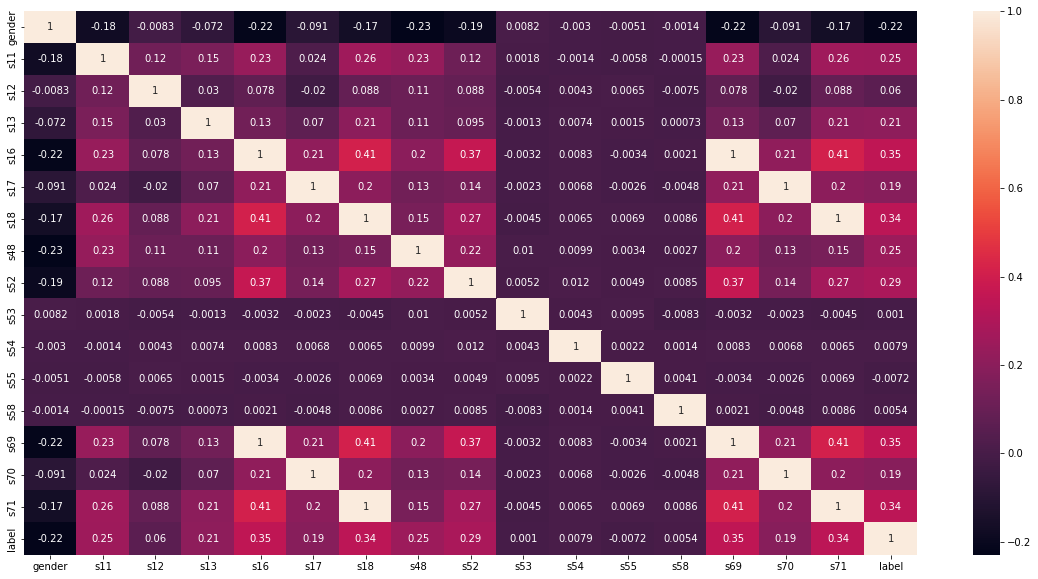

In [11]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_cat, annot=True)

**Observation**: Column pairs (s16, s69), (s17, s70), (s18, s70) are fully correlated. Hence, we will proceed to drop these features later down the pipeline 

In [12]:
corr_num = raw_df.corr()

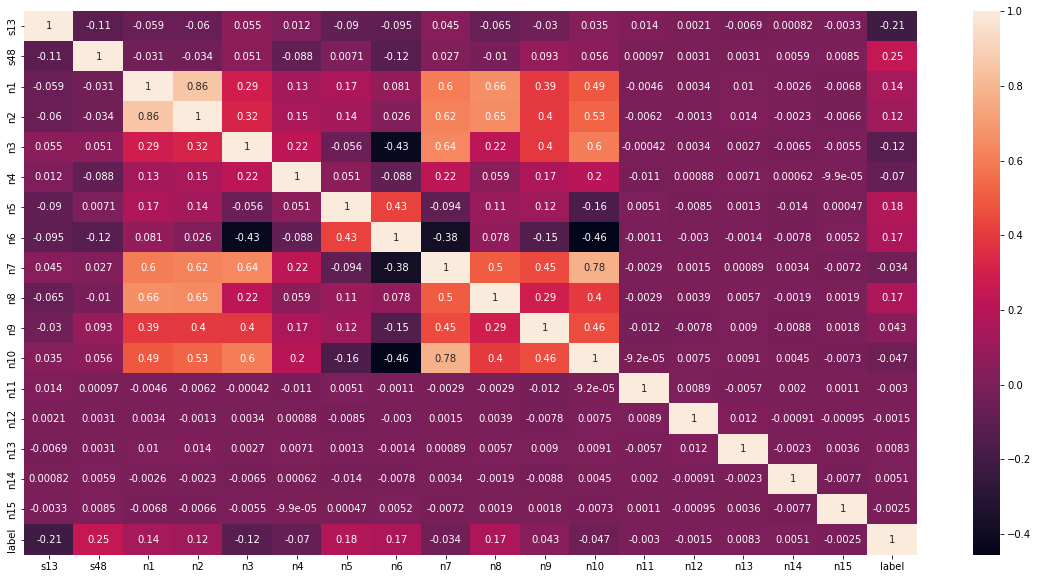

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_num, annot=True)

**Observation**: Column pair (n1, n2) have moderate amount of correlation. Hence, we will proceed to drop this feature

## **Further explorations**

In [14]:
sample = raw_df.sample(2000)

=============== Label vs Other numerical variables ===============
Correlation between gender and n1:  -0.0027329093566583335


<Figure size 500x400 with 0 Axes>

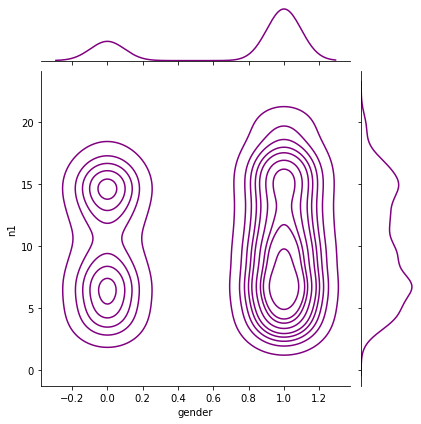

Correlation between gender and n2:  -0.024905195157080375


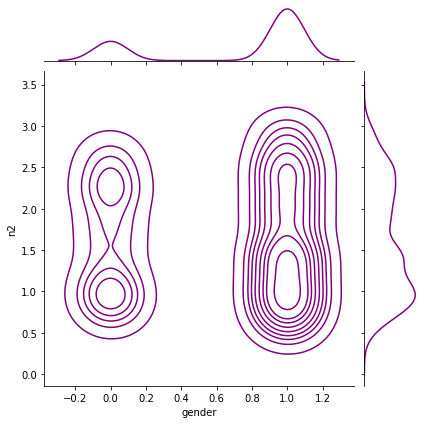

Correlation between gender and n3:  -0.1223309543082547


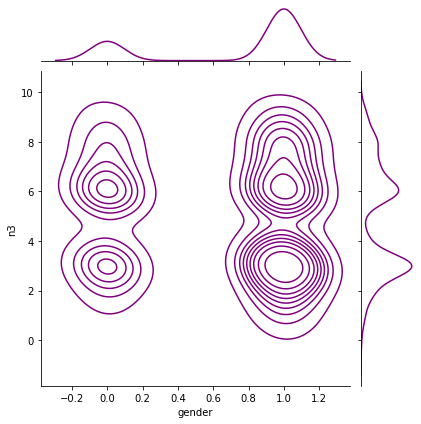

Correlation between gender and n4:  -0.13824637179381608


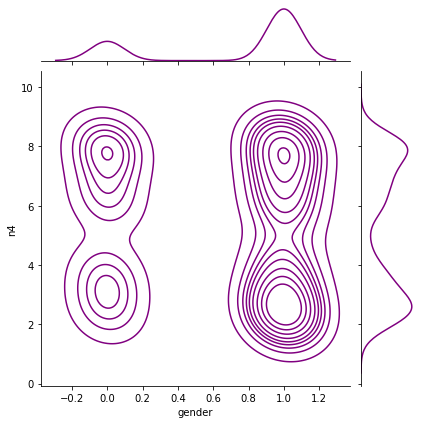

Correlation between gender and n5:  -0.08044279490805578


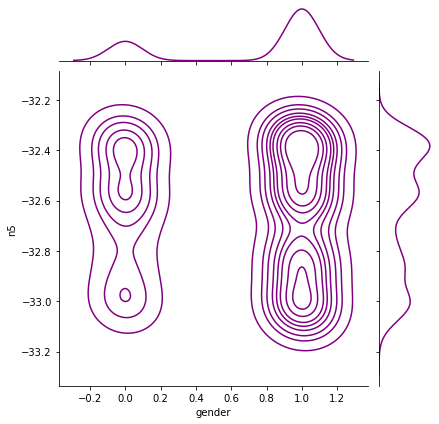

Correlation between gender and n6:  -0.009874325100031901


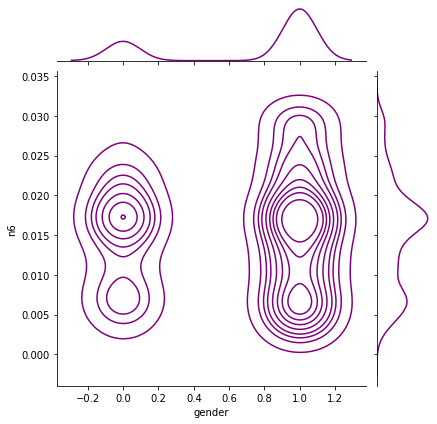

Correlation between gender and n7:  -0.04059122374222112


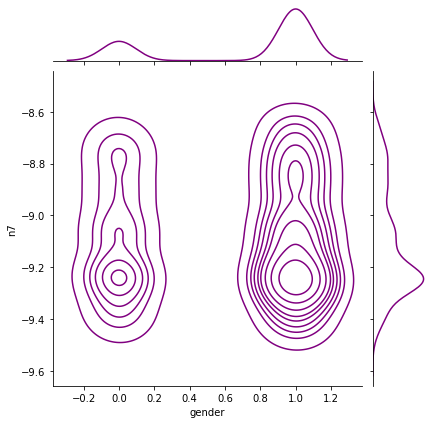

Correlation between gender and n8:  0.11130263530045006


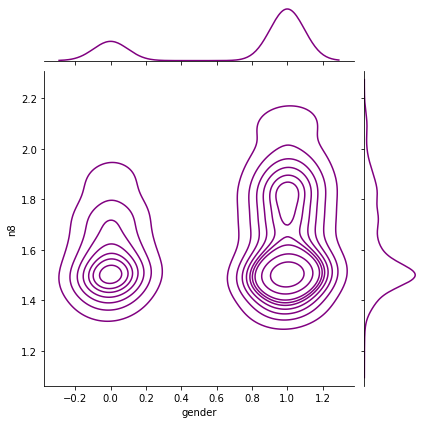

Correlation between gender and n9:  -0.05758331499064645


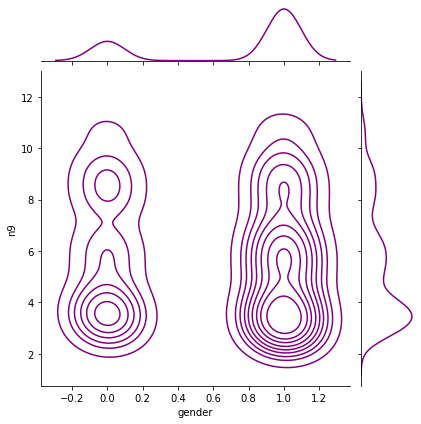

Correlation between gender and n10:  0.01913384702883195


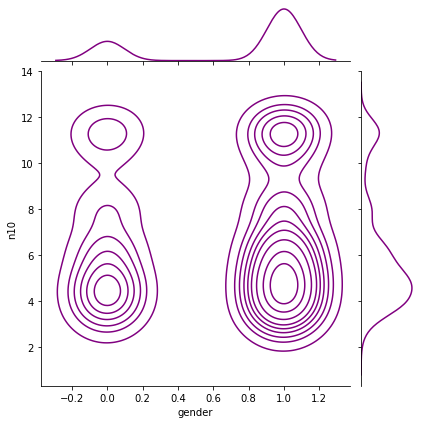

Correlation between gender and n11:  0.06034033682820027


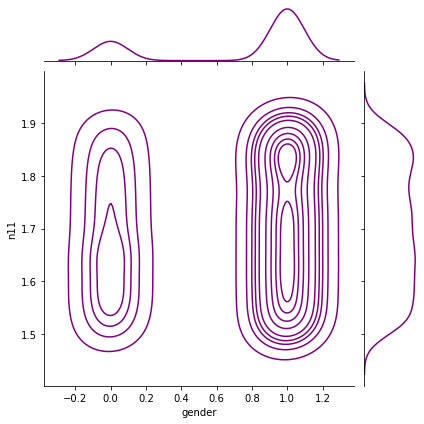

Correlation between gender and n12:  0.01876721001228168


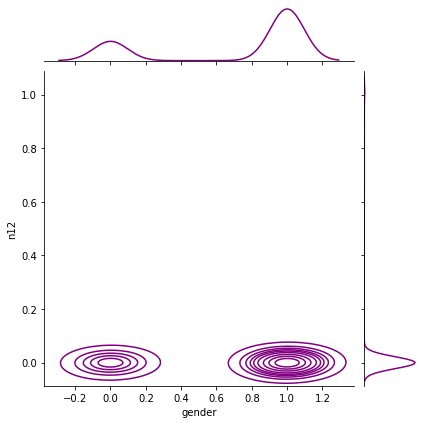

Correlation between gender and n13:  0.011152208175528583


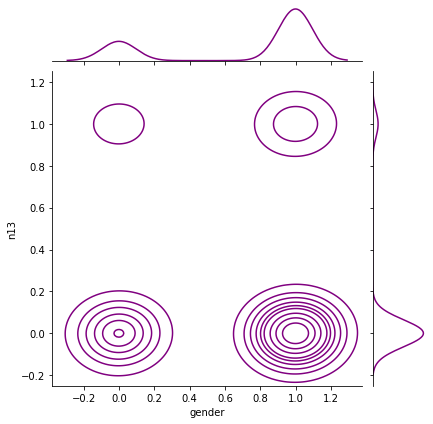

Correlation between gender and n14:  -0.02616661725211038


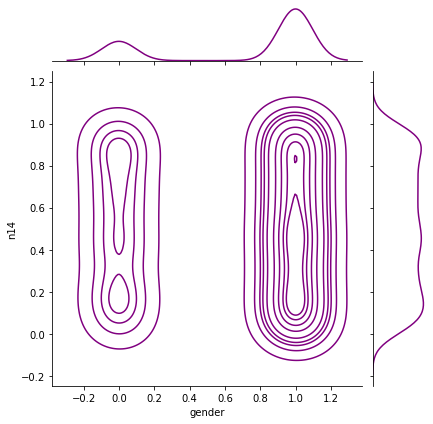

Correlation between gender and n15:  0.007542941251718328


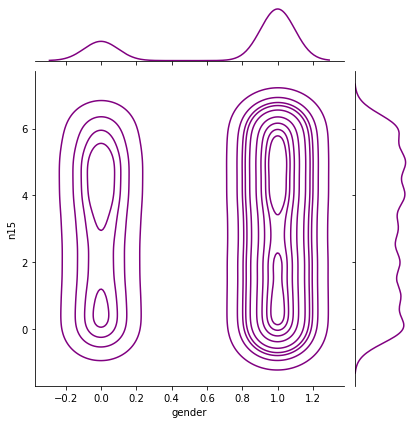

In [15]:
sample['gender'].replace({"M" : 1, "F" : 0}, inplace=True)

plt.figure(dpi = 100, figsize = (5,4))
print("=============== Label vs Other numerical variables ===============")
for i in  sample.columns:
    if i.startswith('n'):
        print(f"Correlation between gender and {i}: ", sample.corr().loc['gender'][i])
        sns.jointplot(x='gender', y=i, data=sample, kind='kde', color='purple')
        plt.show()

=============== Label vs Other numerical variables ===============
Correlation between gender and n1:  -0.0027329093566583335


<Figure size 500x400 with 0 Axes>

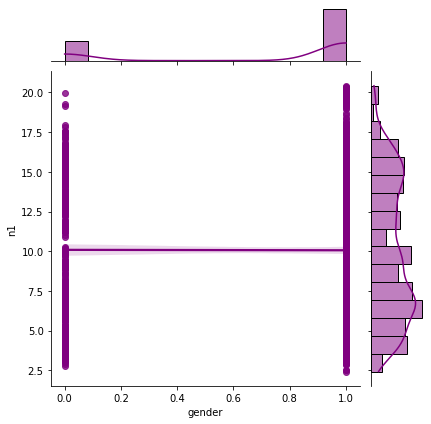

Correlation between gender and n2:  -0.024905195157080375


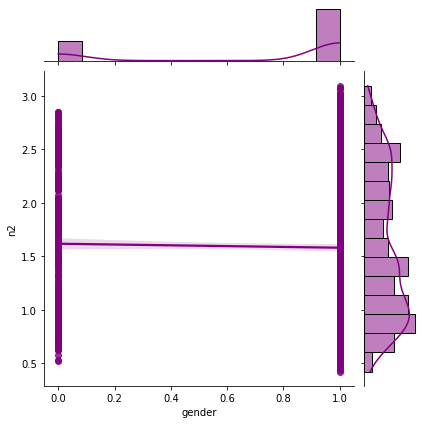

Correlation between gender and n3:  -0.1223309543082547


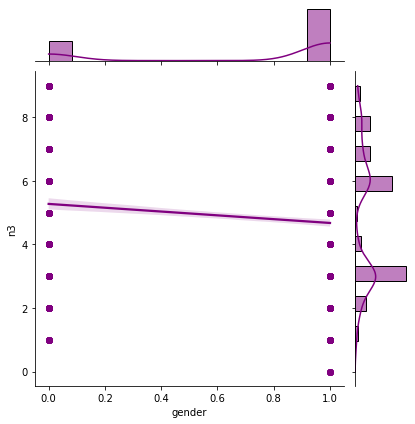

Correlation between gender and n4:  -0.13824637179381608


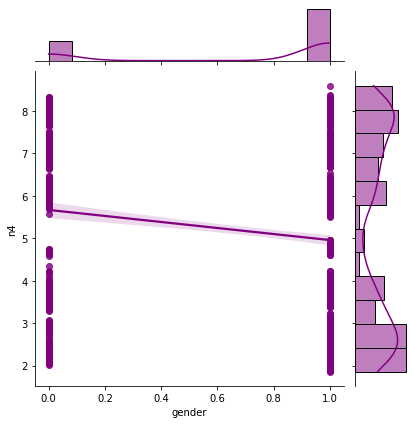

Correlation between gender and n5:  -0.08044279490805578


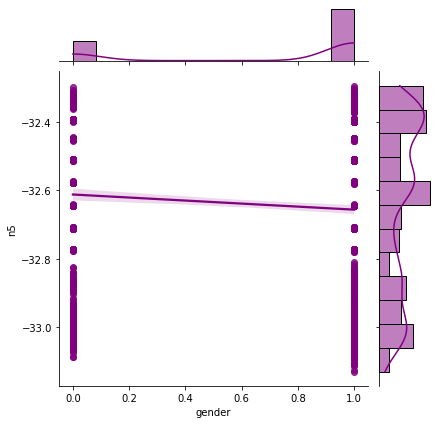

Correlation between gender and n6:  -0.009874325100031901


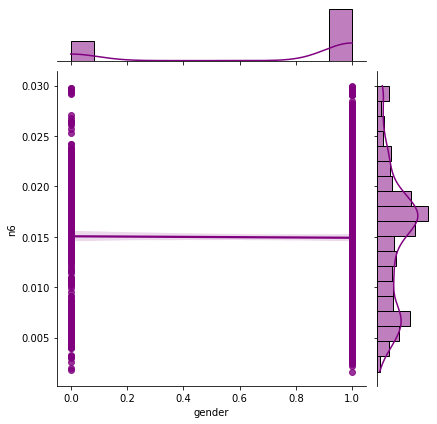

Correlation between gender and n7:  -0.04059122374222112


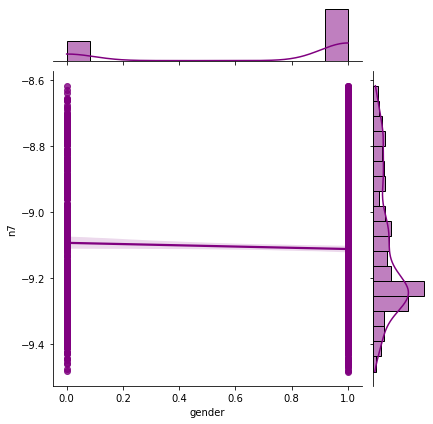

Correlation between gender and n8:  0.11130263530045006


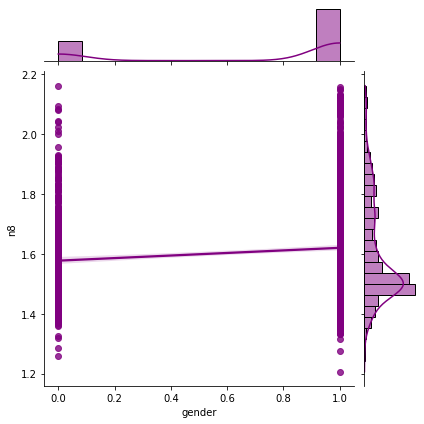

Correlation between gender and n9:  -0.05758331499064645


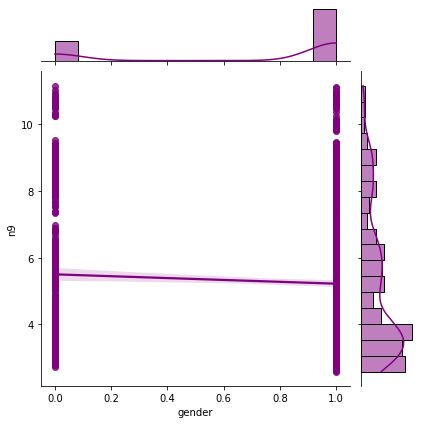

Correlation between gender and n10:  0.01913384702883195


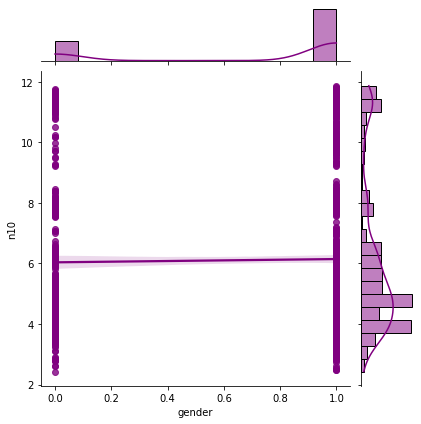

Correlation between gender and n11:  0.06034033682820027


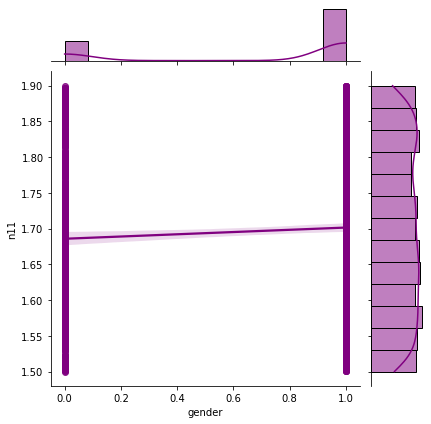

Correlation between gender and n12:  0.01876721001228168


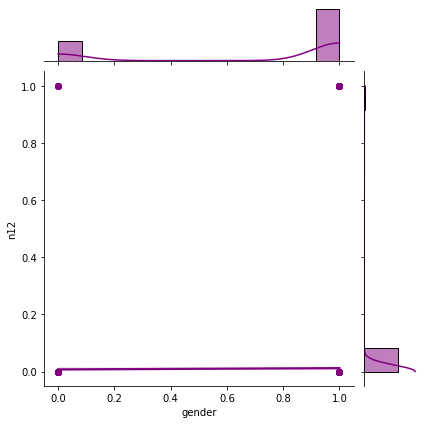

Correlation between gender and n13:  0.011152208175528583


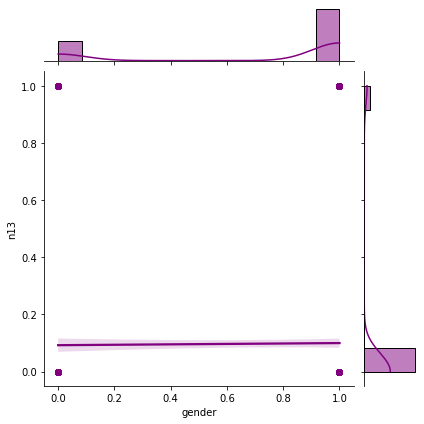

Correlation between gender and n14:  -0.02616661725211038


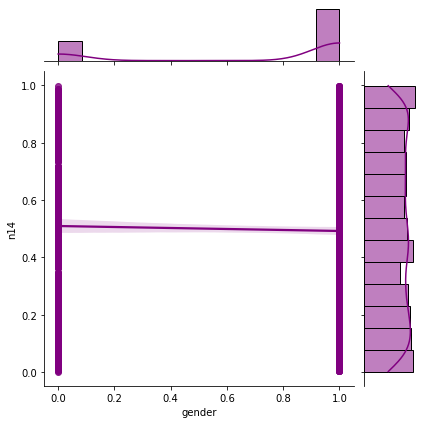

Correlation between gender and n15:  0.007542941251718328


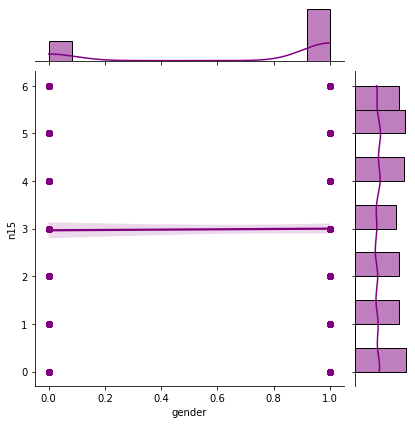

In [16]:
sample['gender'].replace({"M" : 1, "F" : 0}, inplace=True)

plt.figure(dpi = 100, figsize = (5,4))
print("=============== Label vs Other numerical variables ===============")
for i in  sample.columns:
    if i.startswith('n'):
        print(f"Correlation between gender and {i}: ", sample.corr().loc['gender'][i])
        sns.jointplot(x='gender', y=i, data=sample, kind='reg', color='purple')
        plt.show()

From above plots the only difference is observed is the dnsity which is because of the *Gender* imbalance.

========================== Label vs Other numerical variables ==========================
Correlation between label and n1:  0.11769220823962646


<Figure size 500x400 with 0 Axes>

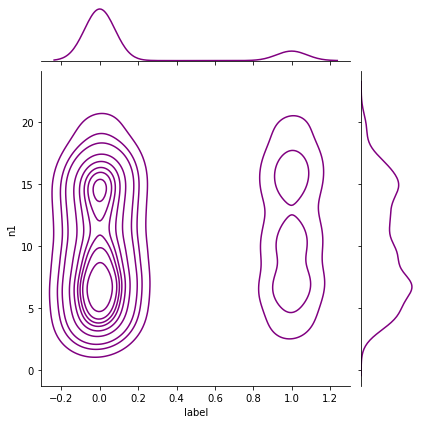

Correlation between label and n2:  0.0867190050648985


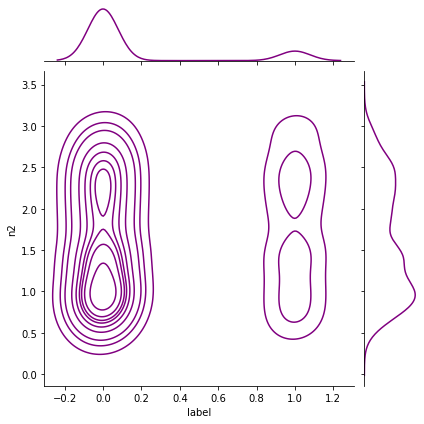

Correlation between label and n3:  -0.13761528393429848


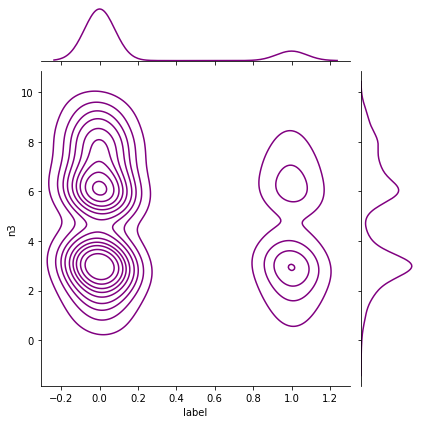

Correlation between label and n4:  -0.036206011282015726


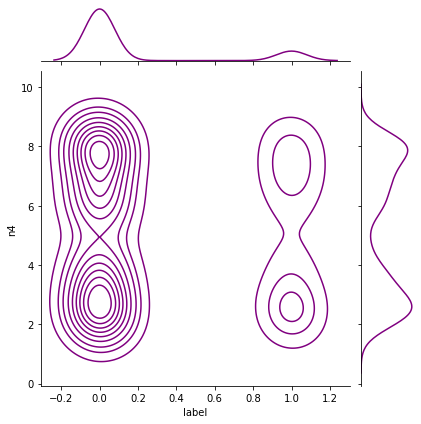

Correlation between label and n5:  0.179732657723281


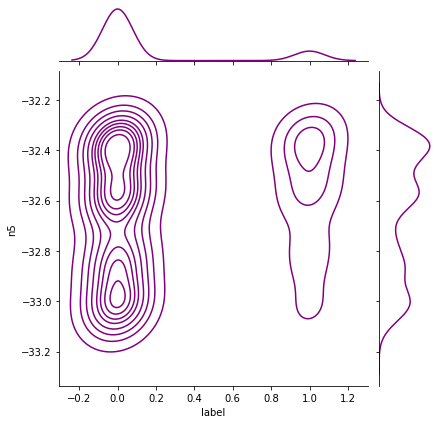

Correlation between label and n6:  0.17475175537826726


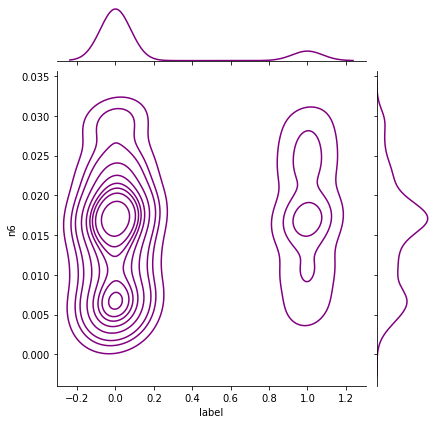

Correlation between label and n7:  -0.041050691833480105


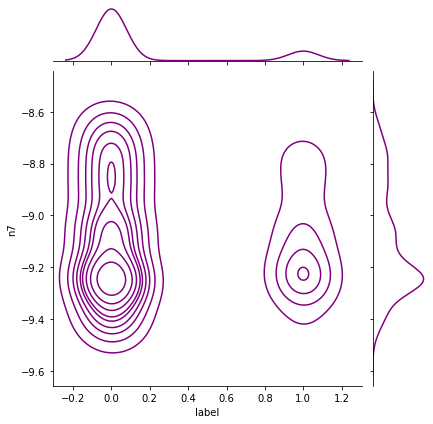

Correlation between label and n8:  0.14828865129133842


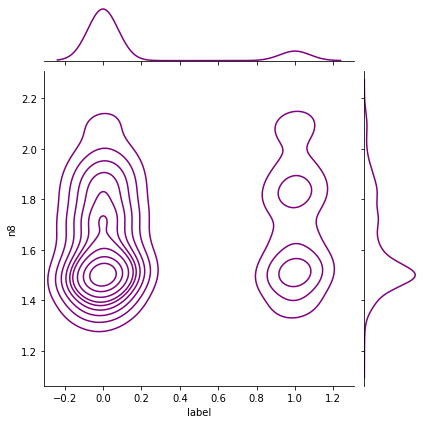

Correlation between label and n9:  0.046641609386846694


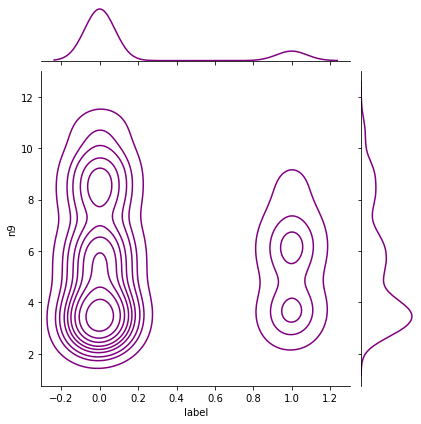

Correlation between label and n10:  -0.0783318629268229


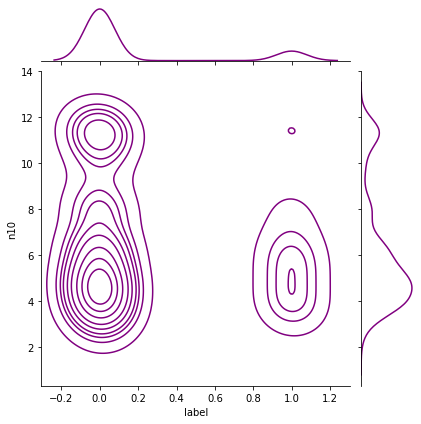

Correlation between label and n11:  0.023747074428942853


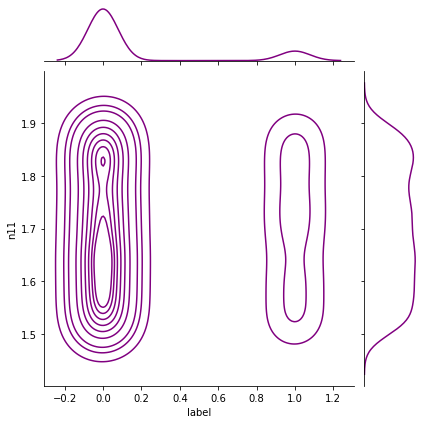

Correlation between label and n12:  0.009942468690120502


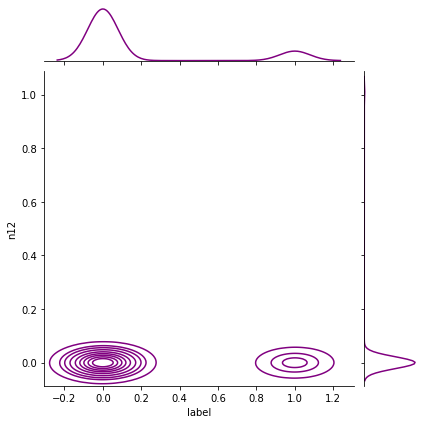

Correlation between label and n13:  -0.006151411047477564


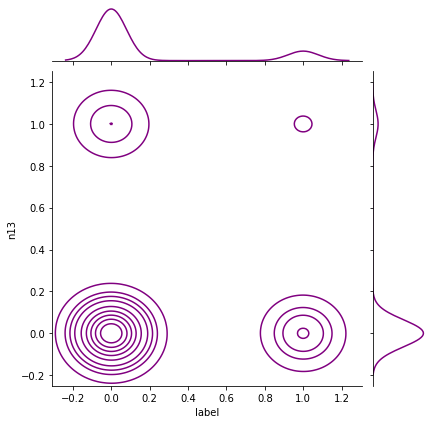

Correlation between label and n14:  0.008735419657408754


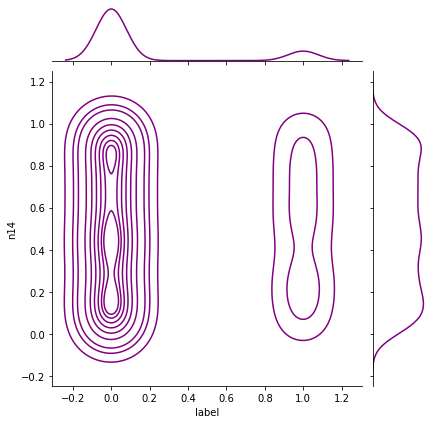

Correlation between label and n15:  0.010989832908083065


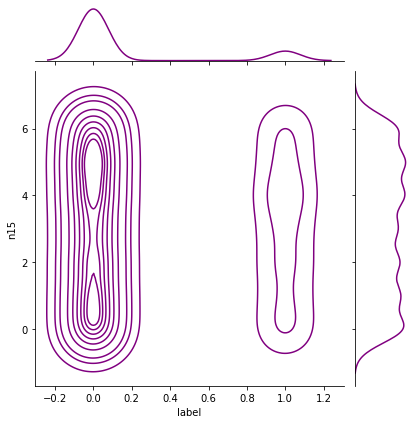

In [17]:
# sample['gender'].replace({"M" : 1, "F" : 0}, inplace=True)

plt.figure(dpi = 100, figsize = (5,4))
print("========================== Label vs Other numerical variables ==========================")
for i in  sample.columns:
    if i.startswith('n'):
        print(f"Correlation between label and {i}: ", sample.corr().loc['label'][i])
        sns.jointplot(x='label', y=i, data=sample, kind='kde', color='purple')
        plt.show()

========================== Label vs Other numerical variables ==========================
Correlation between label and n1: 0.11769220823962646


<Figure size 500x400 with 0 Axes>

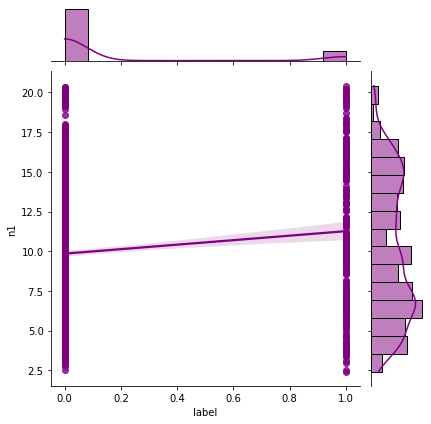

Correlation between label and n2: 0.0867190050648985


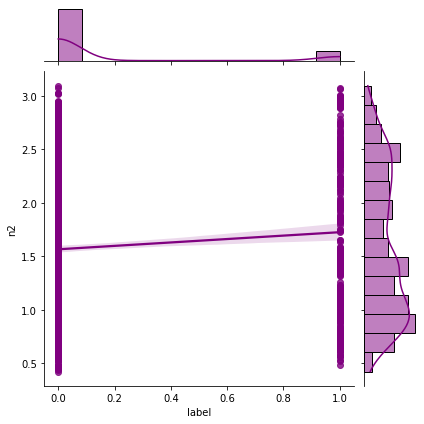

Correlation between label and n3: -0.13761528393429848


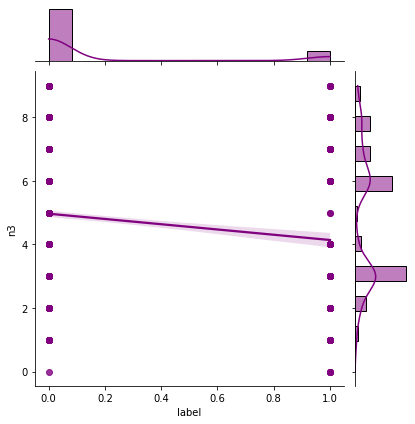

Correlation between label and n4: -0.036206011282015726


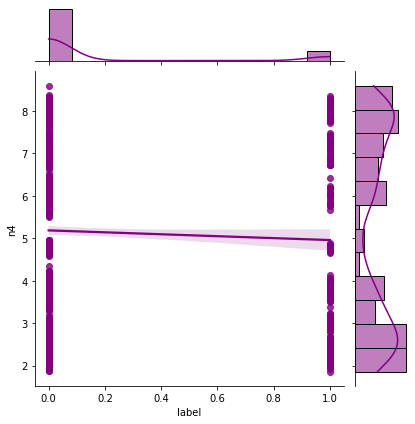

Correlation between label and n5: 0.179732657723281


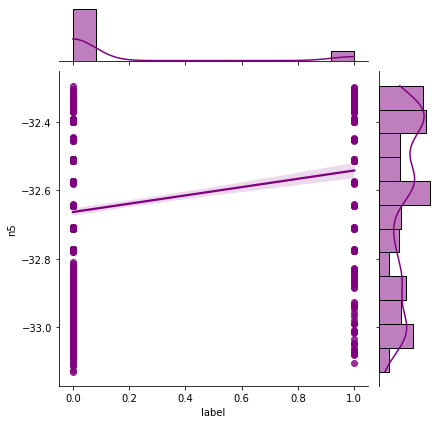

Correlation between label and n6: 0.17475175537826726


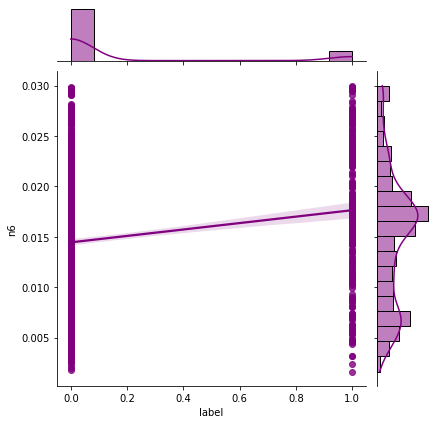

Correlation between label and n7: -0.041050691833480105


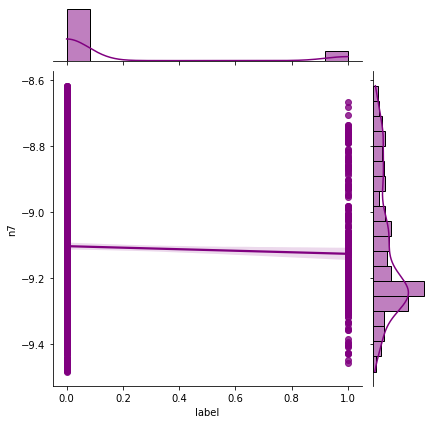

Correlation between label and n8: 0.14828865129133842


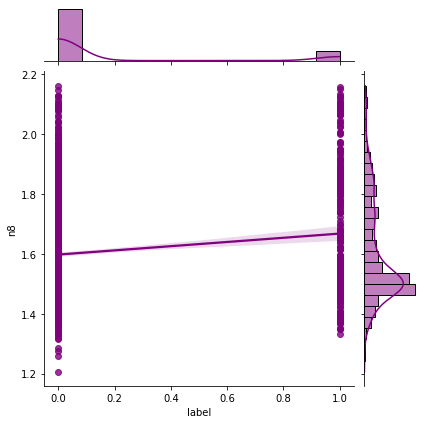

Correlation between label and n9: 0.046641609386846694


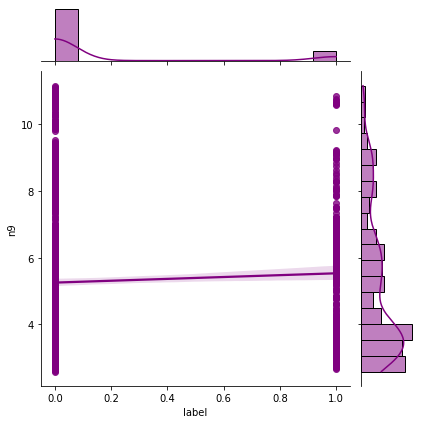

Correlation between label and n10: -0.0783318629268229


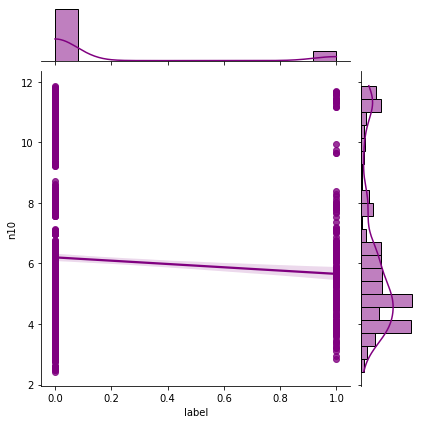

Correlation between label and n11: 0.023747074428942853


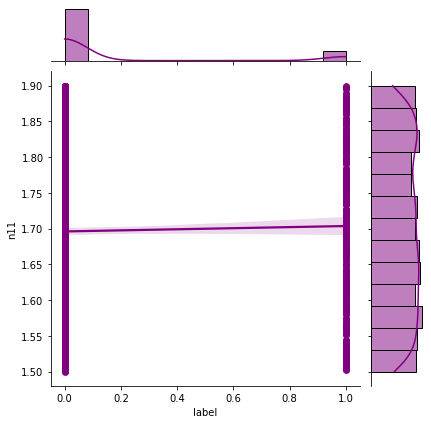

Correlation between label and n12: 0.009942468690120502


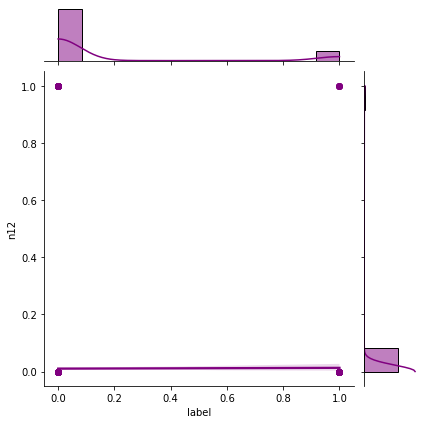

Correlation between label and n13: -0.006151411047477564


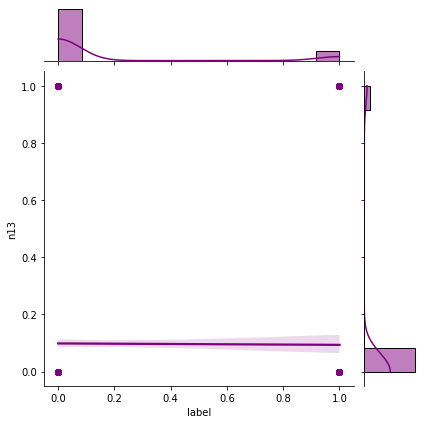

Correlation between label and n14: 0.008735419657408754


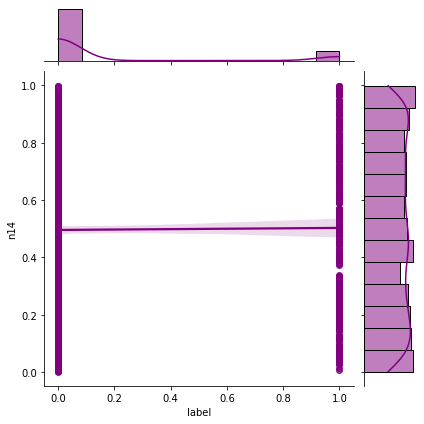

Correlation between label and n15: 0.010989832908083065


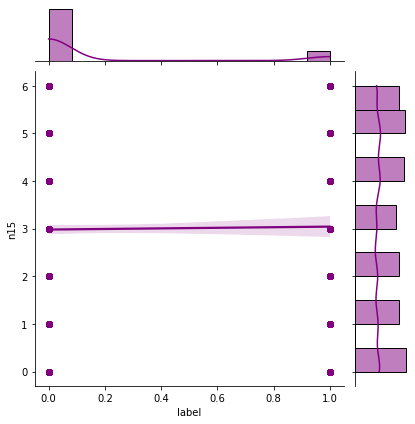

In [18]:
# sample['gender'].replace({"M" : 1, "F" : 0}, inplace=True)

plt.figure(dpi = 100, figsize = (5,4))
print("========================== Label vs Other numerical variables ==========================")
for i in  sample.columns:
    if i.startswith('n'):
        print(f"Correlation between label and {i}:", sample.corr().loc['label'][i])
        sns.jointplot(x='label', y=i, data=sample, kind='reg', color='purple')
        plt.show()

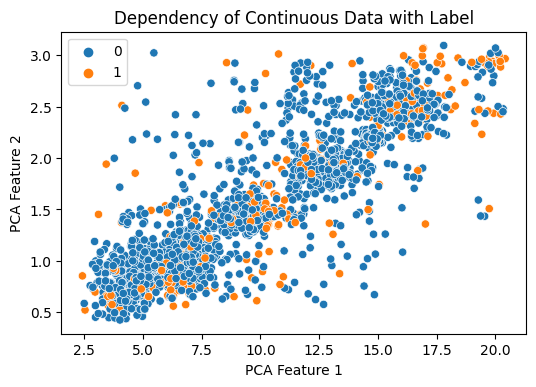

In [19]:
x= sample.drop(columns=[cols for cols in sample.columns if not cols.startswith('n')]).values
y= sample.drop(columns=[cols for cols in sample.columns if not cols.startswith('l')]).values

y = y[:,0]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Continuous Data with Label')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

Data labels are not fairly simple to classify. To work on this type of data a complex tree based model should help the most.

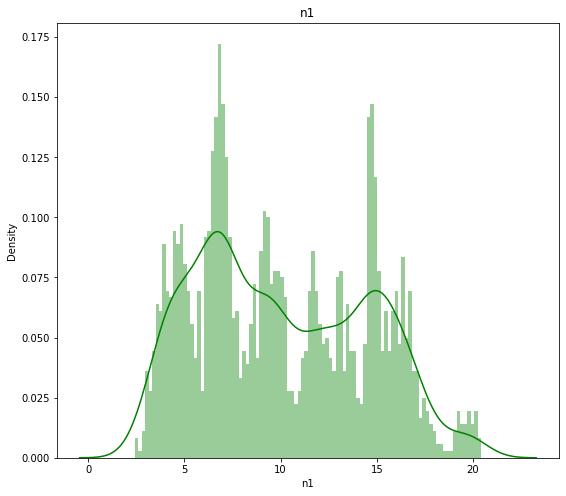

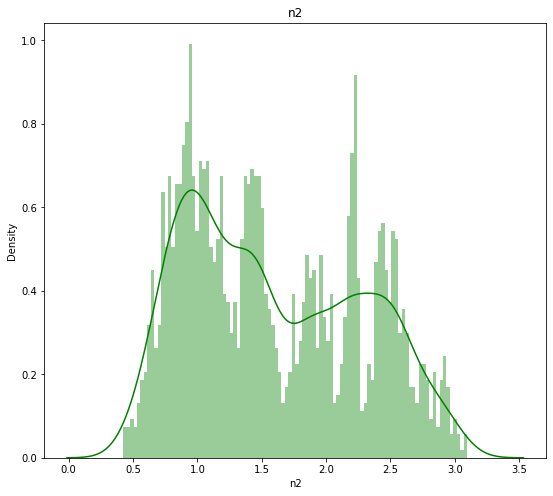

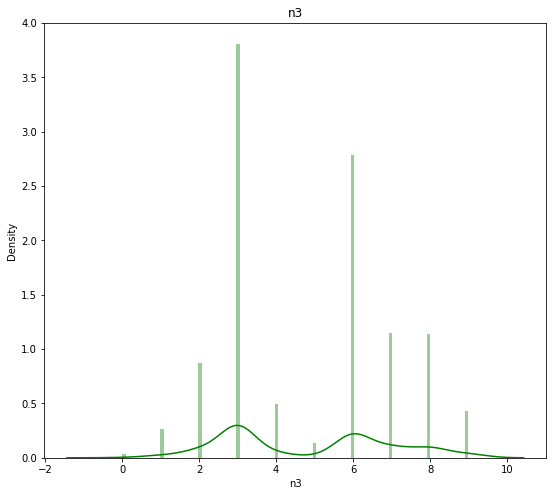

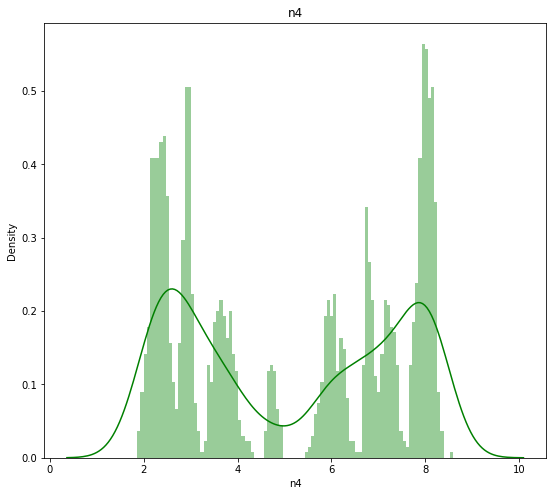

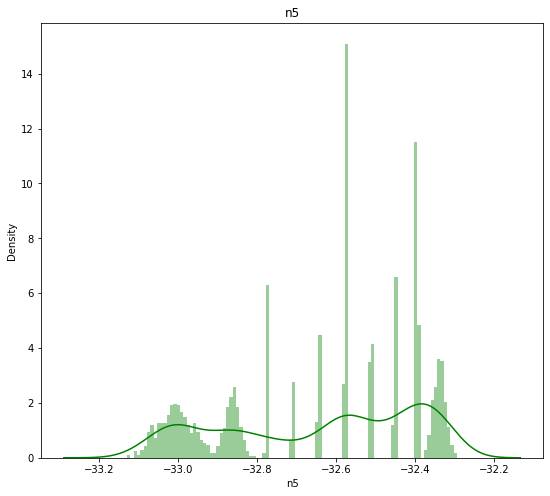

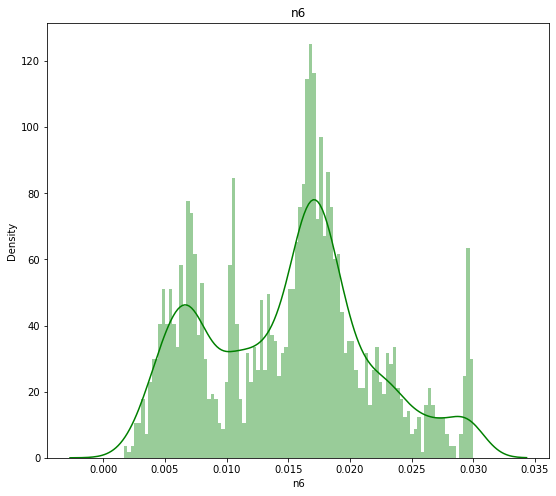

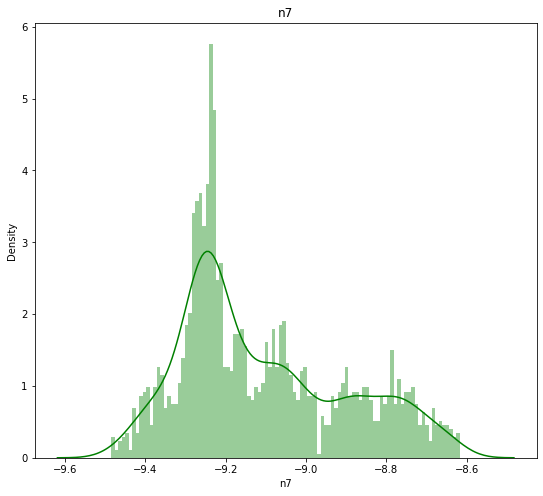

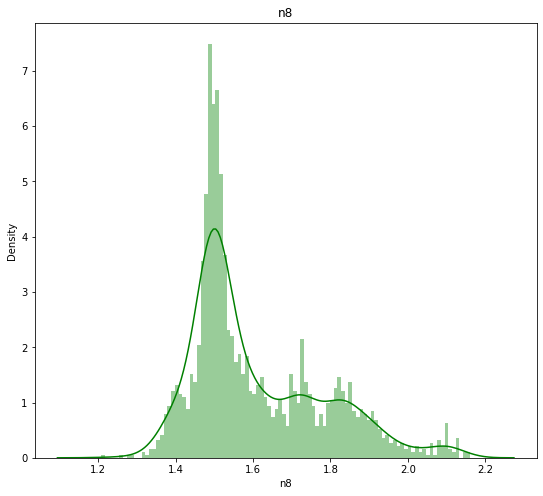

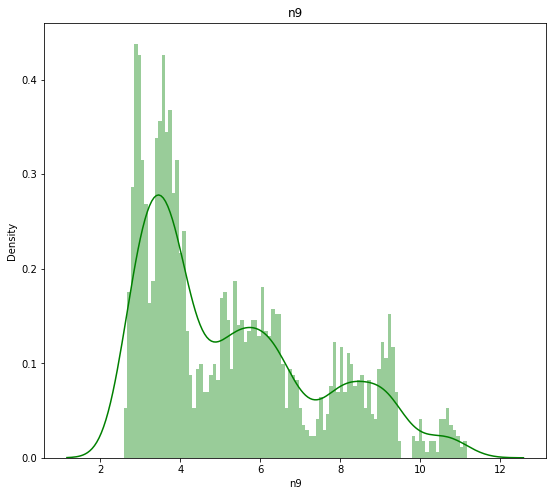

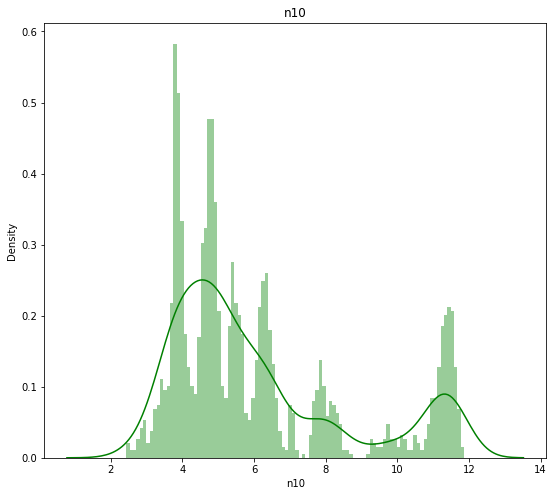

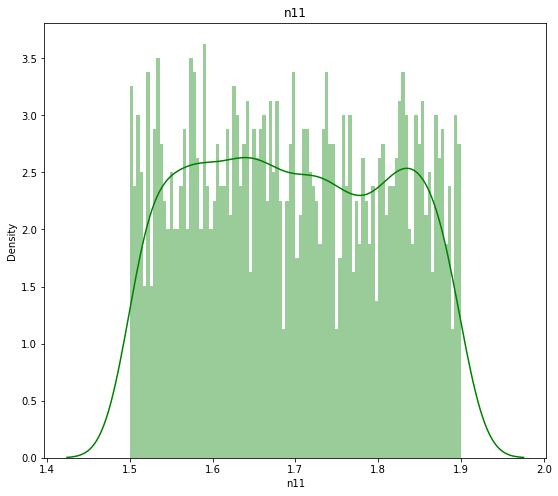

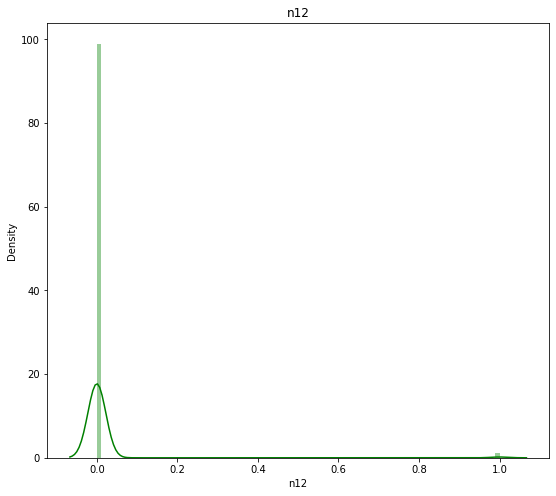

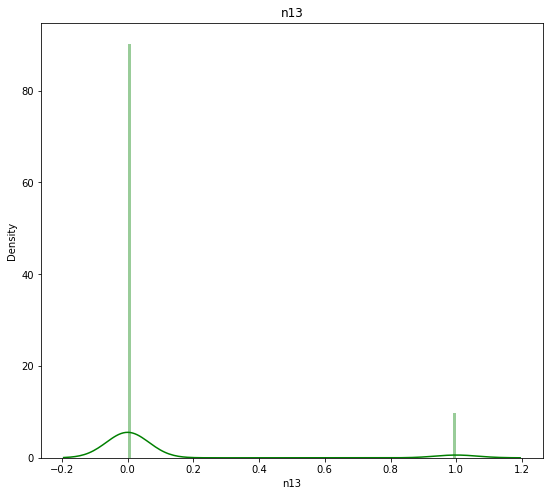

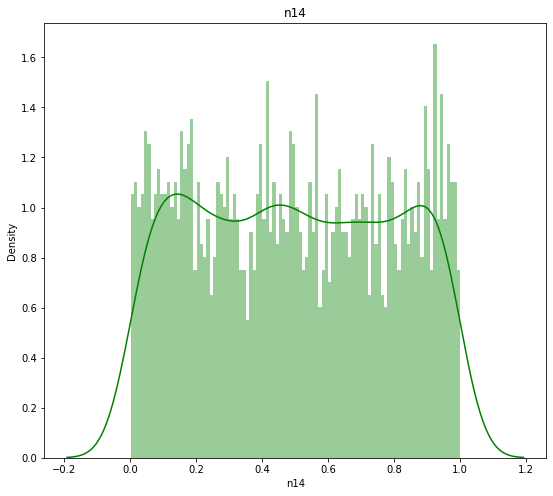

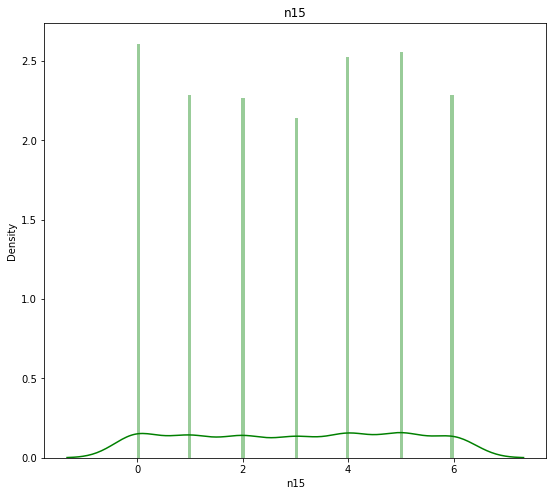

In [20]:
for column in sample:
    if column.startswith('n'):
        plt.figure(figsize=(9, 8))
        plt.title(column)
        sns.distplot(sample[column], color='g', bins=100, hist_kws={'alpha': 0.4});

Numerical data in most cases do not have a normal distributions and are skewed.

## **Encoding**

In [21]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
s13,28322.0,0.983123,0.128814,0.000000,1.000000,1.000000,1.000000,1.000000
s48,28322.0,0.433338,0.495545,0.000000,0.000000,0.000000,1.000000,1.000000
n1,28322.0,10.201863,4.414660,2.200736,6.592127,9.535961,14.432580,20.882733
n2,28322.0,1.600111,0.664985,0.311727,1.013540,1.462197,2.194510,3.137331
n3,28322.0,4.805099,2.199282,0.000000,3.000000,5.000000,6.000000,9.000000
n4,28322.0,5.080537,2.276162,1.700370,2.833161,4.840320,7.300738,8.594620
n5,28322.0,-32.641183,0.241453,-33.167589,-32.862207,-32.577026,-32.396733,-32.289180
n6,28322.0,0.015014,0.006550,0.000584,0.009195,0.016053,0.018771,0.029992
n7,28322.0,-9.107429,0.205200,-9.517986,-9.258473,-9.174557,-8.964786,-8.586583
n8,28322.0,1.612428,0.173560,1.178469,1.489924,1.537263,1.730249,2.173593


In [22]:
for column in raw_df:
    print(column, " unique values: ", raw_df[column].unique())

gender  unique values:  ['M' 'F']
s11  unique values:  ['Y' 'N']
s12  unique values:  ['N' 'Y']
s13  unique values:  [1 0]
s16  unique values:  ['D' 'B' 'C' 'A']
s17  unique values:  ['D' 'C' 'B' 'A']
s18  unique values:  ['B' 'D' 'C' 'A']
s48  unique values:  [0 1]
s52  unique values:  ['1' 'l' '0' 'o']
s53  unique values:  ['  ' ' ']
s54  unique values:  ['Nan' 'b2' 'aa' '22' '2a' '2b' 'a2' 'bb' 'ab' 'ba']
s55  unique values:  ['kK' 'Nan' 'kk' '2K' 'k2' 'KK' '22' 'K2' '2k' 'Kk']
s58  unique values:  ['B' 'A']
s69  unique values:  ['x' '~1' 'C`' '0']
s70  unique values:  ['op: D' 'op: C' 'op: B' 'op: A']
s71  unique values:  ['b' 'd' 'c' 'a']
n1  unique values:  [16.14466597  7.14455819  6.92323603 ... 13.42979701 16.09462206
  7.05810713]
n2  unique values:  [1.98944148 0.8448659  1.04201802 ... 1.80056198 2.43828046 1.02317194]
n3  unique values:  [2 3 6 9 7 8 4 0 5 1]
n4  unique values:  [2.31838468 6.19776785 7.82440091 ... 7.76338648 6.94276637 5.94202455]
n5  unique values:  [-3

=================================================================================================================<br>
From above observations, from a broad aspect, Column names with 'S' are categorical and in case of 'n' those are numerical. <br>

while encoding the features, one thing to consider is that some features maybe of *Likert Scale* which might have numerical dependencies among themselves, on the other hand features can be completely discrete. <br>

To over come this, we took a trial and error approach to encode different features differently
=================================================================================================================<br>

In [23]:
# for column in raw_df:
#     if(raw_df[column].isna().sum()/len(raw_df) > .80):
#         print(f"{column}: {raw_df[column].isna().sum()/len(raw_df)}")

In [24]:
# raw_df['s52'].replace({"l" : "1", "o" : "0"}, inplace=True)

In [25]:
# raw_df['s55'].replace({"kK" : "KK", "Kk" : "KK", "kk" : "KK",  "2k" : "2K", "k2": "K2"}, inplace=True)

In [26]:
raw_df['gender'].replace({"M" : 1, "F" : 3}, inplace=True)

In [27]:
raw_df['s11'].replace({"Y" : 1, "N" :0}, inplace=True)

In [28]:
raw_df['s12'].replace({"Y" : 1, "N" :0}, inplace=True)

In [29]:
# raw_df['s13'].replace({"1" : 1, "0" :0}, inplace=True)

In [30]:
# raw_df['s48'].replace({"1" : 1, "0" :0}, inplace=True) #decresed

In [31]:
# raw_df['s52'].replace({"1" : 1, "l" : 1, "0" :0, "o" :0}, inplace=True) #decresed

In [32]:
# raw_df['s58'].replace({"A" : 0, "B" :1}, inplace=True)

In [33]:
# raw_df['s58'].value_counts().sort_values().plot(kind = 'barh')

In [34]:
# raw_df['s16'].replace({"A" : 0, "B" : 1, "C": 2, "D": 3}, inplace=True)

In [35]:
# raw_df['s17'].replace({"A" : 0, "B" : 1, "C": 2, "D": 3}, inplace=True)

In [36]:
# raw_df['s18'].replace({"A" : 0, "B" : 1, "C": 2, "D": 3}, inplace=True)

# **Stratified K-fold, Train and Validation**

In [37]:
y = raw_df['label']
X = raw_df.drop(columns=['label'])

# dropping correlated as well as features containing only blank spaces
X = X.drop(columns=['n1', 's53', 's69', 's70', 's71'])

#one hot encoding categorical features except the ones already done encoding
for column in X:
    if column.startswith('s') and column not in ['s11', 's12', 's13']:
        temp = pd.get_dummies(X[column], prefix=column)
        X = X.drop(columns=[column])
        X = pd.concat([X, temp], axis=1)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accs = []
aucs = []

for train_index, test_index in skf.split(X, y):

    #splitting the data
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    print("Shape: ", x_train_fold.shape)
    
    undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=1) #submission 5
    x_train_fold, y_train_fold = undersample.fit_resample(x_train_fold, y_train_fold)

    oversample = ADASYN(sampling_strategy='auto', random_state=42, n_neighbors=5)
    x_train_fold, y_train_fold = oversample.fit_resample(x_train_fold, y_train_fold)

    print("Shape: ", x_train_fold.shape)

    #scaling the data
    scaler = preprocessing.MinMaxScaler()
    x_train_fold = scaler.fit_transform(x_train_fold)
    x_test_fold = scaler.transform(x_test_fold)
    

    model = RandomForestClassifier(max_features='sqrt', n_estimators=100, min_samples_leaf=30, max_depth=10, criterion='entropy', random_state=0)

    # fit the model on the train fold
    model.fit(x_train_fold, y_train_fold)

    # predict labels for test fold
    y_pred = model.predict(x_test_fold)
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test_fold, y_pred)
    curr_auc = metrics.auc(fpr, tpr)
    aucs.append(curr_auc)

    curr_acc = accuracy_score(y_test_fold, y_pred)
    accs.append(curr_acc)

    print(curr_acc)
    print(curr_auc)

    if curr_auc >= max(aucs):
        best_model = model
        best_scaler = scaler
        print("Saving")

    print('\n')

print( "Average accuracy: ", sum(accs)/len(accs))
print( "Average AUC: ", sum(aucs)/len(aucs))


    # print(x_train_fold.shape, " ", x_test_fold.shape)
    # print(y_train_fold.shape, " ", y_test_fold.shape)
    # lr.fit(x_train_fold, y_train_fold)
    # lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))

Shape:  (25489, 58)
Shape:  (16552, 58)
0.8217437345570067
0.8031756826616943
Saving


Shape:  (25489, 58)
Shape:  (16543, 58)
0.8228026826685493
0.7971057960732023


Shape:  (25490, 58)
Shape:  (16534, 58)
0.8146186440677966
0.792189796122184


Shape:  (25490, 58)
Shape:  (16499, 58)
0.8082627118644068
0.7757968212751996


Shape:  (25490, 58)
Shape:  (16540, 58)
0.8163841807909604
0.7882217403090268


Shape:  (25490, 58)
Shape:  (16595, 58)
0.8089689265536724
0.7829268379677847


Shape:  (25490, 58)
Shape:  (16584, 58)
0.8245056497175142
0.7880737184517271


Shape:  (25490, 58)
Shape:  (16564, 58)
0.8135593220338984
0.7982586922714756


Shape:  (25490, 58)
Shape:  (16552, 58)
0.8199152542372882
0.8129752749996433
Saving


Shape:  (25490, 58)
Shape:  (16577, 58)
0.8057909604519774
0.786045997346307


Average accuracy:  0.8156552066943069
Average AUC:  0.7924770357478245


In [38]:
# Get numerical feature importances
importances = list(best_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances

for pair in feature_importances:
    print('Variable: {:10} Importance: {}'.format(*pair))

Variable: s16_D      Importance: 0.135
Variable: s16_B      Importance: 0.099
Variable: s52_1      Importance: 0.081
Variable: n5         Importance: 0.071
Variable: s48_0      Importance: 0.071
Variable: gender     Importance: 0.07
Variable: s18_B      Importance: 0.061
Variable: s11        Importance: 0.051
Variable: s52_l      Importance: 0.051
Variable: n6         Importance: 0.035
Variable: n8         Importance: 0.035
Variable: s48_1      Importance: 0.029
Variable: n2         Importance: 0.028
Variable: s17_D      Importance: 0.022
Variable: n7         Importance: 0.021
Variable: n4         Importance: 0.017
Variable: n10        Importance: 0.016
Variable: n3         Importance: 0.015
Variable: n9         Importance: 0.015
Variable: n11        Importance: 0.013
Variable: n14        Importance: 0.012
Variable: s52_0      Importance: 0.008
Variable: s18_C      Importance: 0.007
Variable: s18_D      Importance: 0.007
Variable: s13        Importance: 0.006
Variable: n15        Impor

In [39]:
feature_list = X.columns

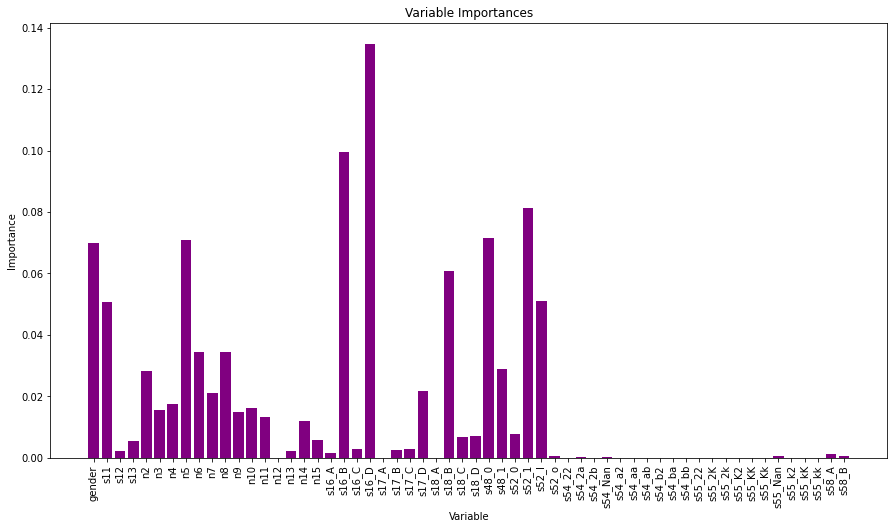

In [40]:
plt.figure(figsize=(15, 8))

x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'purple', linewidth = 1.2)
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

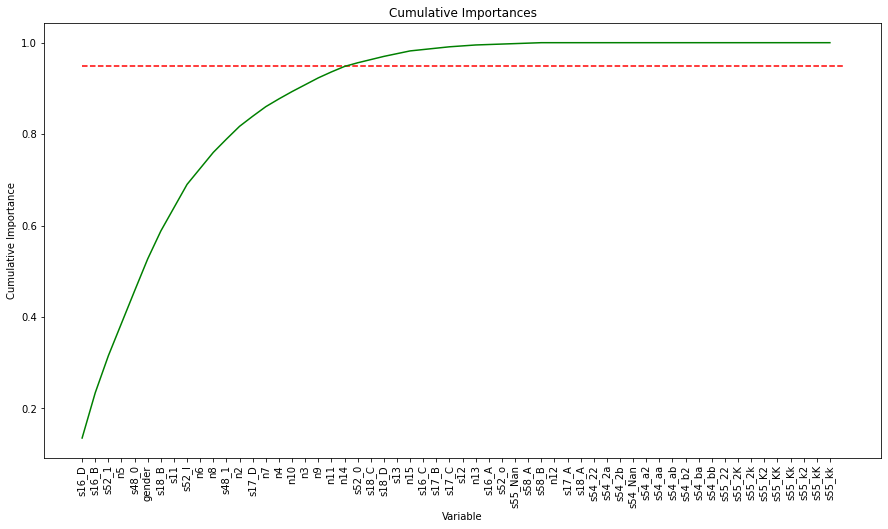

In [41]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.figure(figsize=(15, 8))
plt.plot(x_values, cumulative_importances, 'g-')
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical')
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [42]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 98% importance:', np.where(cumulative_importances > 0.98)[0][0] + 1)

Number of features for 98% importance: 26


In [43]:
explainer = shap.TreeExplainer(best_model)

In [44]:
choosen_instance = X.loc[[421]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

# **TEST**

Load data

In [45]:
test_df = pd.read_csv("/content/drive/MyDrive/EC/datathon-2.0/dataset/test.csv")
test_df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,...,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,...,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,...,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,...,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,...,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0
5,b'gAAAAABinOjXAODyYIVqRlaoPYbx-Jv8eRgDswdtPGjv...,M,Y,Y,1,D,D,B,0,1,...,0.006217,-8.691409,1.524488,8.477102,11.503684,1.824085,0,0,0.787256,6
6,b'gAAAAABinOisnbt53eXCkLke8jizXWRz7--dNFUc7_Kv...,M,N,Y,1,B,D,C,1,l,...,0.010729,-9.233940,1.490601,7.347506,5.708466,1.593072,0,0,0.878133,1
7,b'gAAAAABinOiyF59tNYeyeqJgOghB-WdrHMvt0VlyS6Ea...,M,Y,Y,1,D,D,B,1,1,...,0.005381,-8.779382,1.718437,5.376519,10.905976,1.895801,0,0,0.769569,6
8,b'gAAAAABinOjR9YDjuAxxfRNtfd_3BVP0tadTnZSmQhOw...,M,N,Y,1,B,D,B,1,1,...,0.009376,-8.809759,1.962656,6.780483,11.438956,1.847398,0,0,0.905184,2
9,b'gAAAAABinOjFpdyJwRKQxC-tnq4zhpFb7zg2T0jh2tOY...,M,Y,N,1,B,B,D,1,l,...,0.018922,-9.143473,1.532382,2.911209,3.701080,1.843613,0,0,0.792054,2


In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85065 entries, 0 to 85064
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      85065 non-null  object 
 1   gender  85065 non-null  object 
 2   s11     85065 non-null  object 
 3   s12     85065 non-null  object 
 4   s13     85065 non-null  int64  
 5   s16     85065 non-null  object 
 6   s17     85065 non-null  object 
 7   s18     85065 non-null  object 
 8   s48     85065 non-null  int64  
 9   s52     85065 non-null  object 
 10  s53     85065 non-null  object 
 11  s54     7743 non-null   object 
 12  s55     9421 non-null   object 
 13  s56     0 non-null      float64
 14  s57     0 non-null      float64
 15  s58     85065 non-null  object 
 16  s59     0 non-null      float64
 17  s69     85065 non-null  object 
 18  s70     85065 non-null  object 
 19  s71     85065 non-null  object 
 20  n1      85065 non-null  float64
 21  n2      85065 non-null  float64
 22

## Drop null values

In [47]:
test_df = test_df.drop(columns=['id'])

for column in test_df:
    if(test_df[column].isna().sum()/len(test_df) > .95):
        print(f"Dropped: {column}")
        test_df = test_df.drop(columns=[column])

# raw_df = raw_df.dropna()

Dropped: s56
Dropped: s57
Dropped: s59


In [48]:
for column in test_df:
    if(test_df[column].isna().sum()/len(test_df) > .80):
        print(f"{column}: {test_df[column].isna().sum()/len(test_df)}")
        test_df[column] = test_df[column].fillna('Nan')

s54: 0.9089754893316875
s55: 0.8892493975195439


## Encoding categorical features similar to train

In [49]:
test_df['gender'].replace({"M" : 1, "F" : 3}, inplace=True)

In [50]:
test_df['s11'].replace({"Y" : 1, "N" :0}, inplace=True)

In [51]:
test_df['s12'].replace({"Y" : 1, "N" :0}, inplace=True)

In [52]:
test_df = test_df.drop(columns=['n1', 's53', 's69', 's70', 's71'])

#one hot encoding
for column in test_df:
    if column.startswith('s') and column not in ['s11', 's12', 's13']:
        temp = pd.get_dummies(test_df[column], prefix=column)
        test_df = test_df.drop(columns=[column])
        test_df = pd.concat([test_df, temp], axis=1)

In [53]:
test_df = test_df.drop(columns=[cols for cols in test_df.columns if cols not in X.columns ])

In [54]:
len(list(test_df.columns))

58

In [55]:
len(list(X.columns))

58

In [56]:
test_df = best_scaler.transform(test_df)


# predict labels for test fold
test_pred = best_model.predict(test_df)

In [57]:
test_pred

array([1, 1, 1, ..., 1, 1, 0])

## Save submission and model files

In [58]:
test_df = pd.read_csv("/content/drive/MyDrive/EC/datathon-2.0/dataset/test.csv")

In [59]:
df = pd.DataFrame()

df['id'] = test_df['id']
df['label'] = test_pred

In [60]:
df.head()

,id,label
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,0


In [61]:
df.to_csv('Code_TeamSalty_1n26ei.csv', index=False)

In [62]:
# import pickle

# file_name = "xgb_v6.pkl"
# # save
# pickle.dump(best_model, open(file_name, "wb"))

# file_name = "scaler_v6.pkl"
# # save
# pickle.dump(best_scaler, open(file_name, "wb"))